# Lesson 5: Coding and Financial Analysis

## Setup

In [3]:
# !pip install autogen openai
# !pip install chess

In [4]:
# reset all those keys
import os
openai_api_key = os.getenv("OPENAI_API_KEY")

In [5]:
llm_config = {"model": "gpt-4-turbo"}

## Define a code executor

In [8]:
# !pip install dask

In [9]:
from autogen.coding import LocalCommandLineCodeExecutor

In [10]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

## Create agents

In [11]:
from autogen import ConversableAgent, AssistantAgent

### 1. Agent with code executor configuration

In [12]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",  # allows human input
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability

In [13]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [14]:
code_writer_agent_system_message = code_writer_agent.system_message

In [15]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## The task!

Ask the two agents to collaborate on a stock analysis task.

In [16]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

<p style="background-color:#ECECEC; padding:15px; "> <b>Note:</b> In this lesson, you will use GPT 4 for better results. Please note that the lesson has a quota limit. If you want to explore the code in this lesson further, we recommend trying it locally with your own API key.

**Note**: You might see a different set of outputs than those shown in the video. The agents collaborate to generate the code needed for your task, and they might produce code with errors in the process. However, they will ultimately provide a correct code in the end.

In [19]:
# !pip install yfinance matplotlib

In [41]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-10-16. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To plot the Year-To-Date (YTD) stock gains for NVDA and TSLA on today's date, which is 2024-10-16, we need to follow these steps:

1. Collect stock prices for NVDA and TSLA from the beginning of the year (2024-01-01) until today (2024-10-16).
2. Compute the percentage gain for each day by comparing the current day's price to the first day's price.
3. Plot this information, showing percentage gain over time.
4. Save the plot to a file named `ytd_stock_gains.png`.

Let's start by writing the Python code to collect and process the data, plot it, and save the figure. Execute the following Python code:

```python
# filename: plot_ytd_gains.py
import ma

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


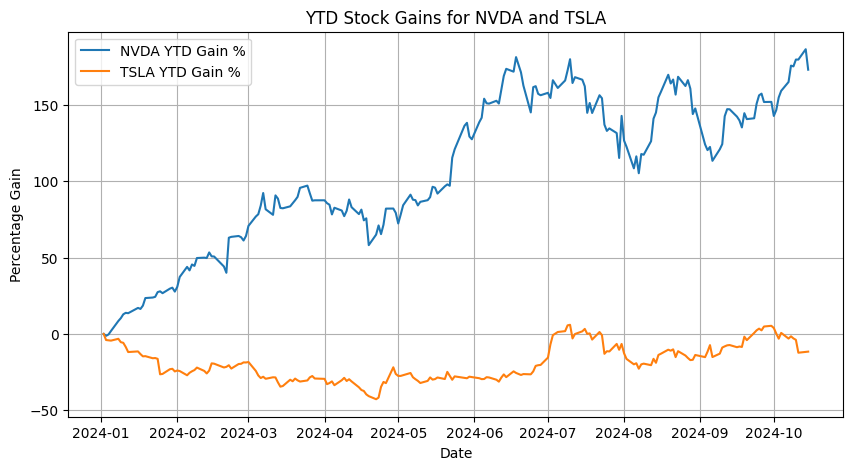

In [23]:
# filename: plot_stocks.py

import yfinance as yf
import matplotlib.pyplot as plt

# Set the start and end dates
start_date = '2024-01-01'
end_date = '2024-10-16'

# Fetching data for NVIDIA and Tesla
nvda_data = yf.download('NVDA', start=start_date, end=end_date)
tsla_data = yf.download('TSLA', start=start_date, end=end_date)

# Calculating the YTD gains in percentage
nvda_gain = (nvda_data['Close'] / nvda_data['Close'].iloc[0] - 1) * 100
tsla_gain = (tsla_data['Close'] / tsla_data['Close'].iloc[0] - 1) * 100

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(nvda_gain, label='NVDA YTD Gain %')
plt.plot(tsla_gain, label='TSLA YTD Gain %')
plt.title('YTD Stock Gains for NVDA and TSLA')
plt.ylabel('Percentage Gain')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('ytd_stock_gains.png')
plt.show()

In [21]:
# filename: test_fetch_data.py

import yfinance as yf

# Testing data download for one week to verify functionality
nvda_test = yf.download('NVDA', period='1wk')
tsla_test = yf.download('TSLA', period='1wk')

# Print the closing prices to verify data retrieval
print("NVDA Data:")
print(nvda_test['Close'])
print("\nTSLA Data:")
print(tsla_test['Close'])

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NVDA']: YFInvalidPeriodError("%ticker%: Period '1wk' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TSLA']: YFInvalidPeriodError("%ticker%: Period '1wk' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


NVDA Data:
Series([], Name: Close, dtype: float64)

TSLA Data:
Series([], Name: Close, dtype: float64)


## Let's see the plot!

**Note**:
* Your plot might differ from the one shown in the video because the LLM's freestyle code generation could choose a different plot type, such as a bar plot.
* You can re-run the previous cell and check the generated code. If it produces a bar plot, remember you can directly specify your preference by asking for a specific plot type instead of a bar plot.

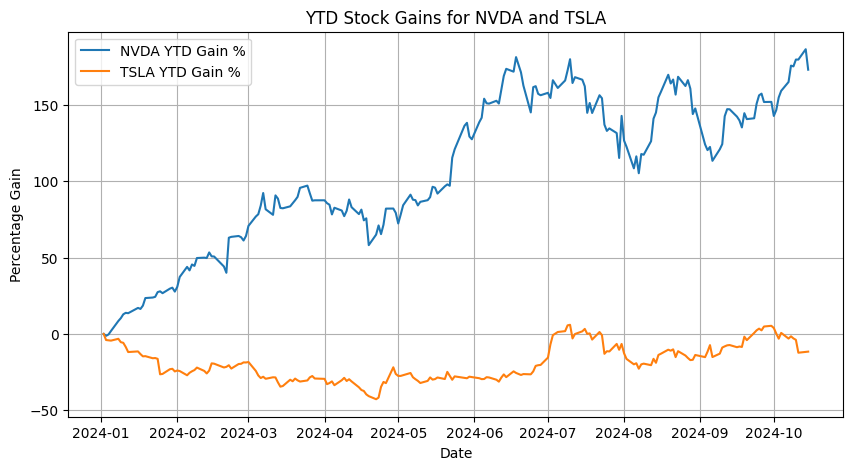

In [25]:
import os
from IPython.display import Image

Image(os.path.join("", "nvda_tsla.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

In [26]:
# any ticker would work here
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

In [27]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

### Create a new executor with the user-defined functions

In [28]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [29]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

### Let's update the agents with the new system message

In [30]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [31]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

### Start the same task again!

In [40]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-10-16.Download the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Here is the Python code that will download the year-to-date (YTD) stock prices for NVIDIA (NVDA) and Tesla (TSLA) from 2024-01-01 to today (2024-10-16). The code will then plot these stock prices and save the plot to a file named "stock_prices_YTD_plot.png".

```python
# filename: get_plot_stock_prices.py
from functions import get_stock_prices, plot_stock_prices
import datetime

# Define stock symbols and date range
stock_symbols = ['NVDA', 'TSLA']
start_date = '2024-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')  # Today's date in 'YYYY-MM-DD' format

# Fetch the stock prices YTD
stock_prices = get_stock_prices(stock_

[*********************100%***********************]  2 of 2 completed


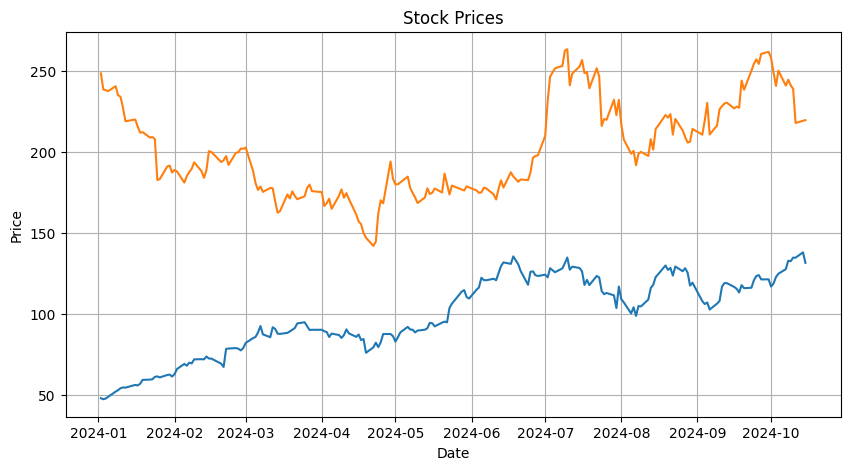

In [37]:
# filename: get_plot_stock_prices.py
# from functions import get_stock_prices, plot_stock_prices
import datetime

# Define stock symbols and date range
stock_symbols = ['NVDA', 'TSLA']
start_date = '2024-01-01'
end_date = datetime.date.today().strftime('%Y-%m-%d')  # Today's date in 'YYYY-MM-DD' format

# Fetch the stock prices YTD
stock_prices = get_stock_prices(stock_symbols, start_date, end_date)

# Plotting and saving the stock prices as a PNG file
plot_stock_prices(stock_prices, 'stock_prices_YTD_plot.png')

### Plot the results

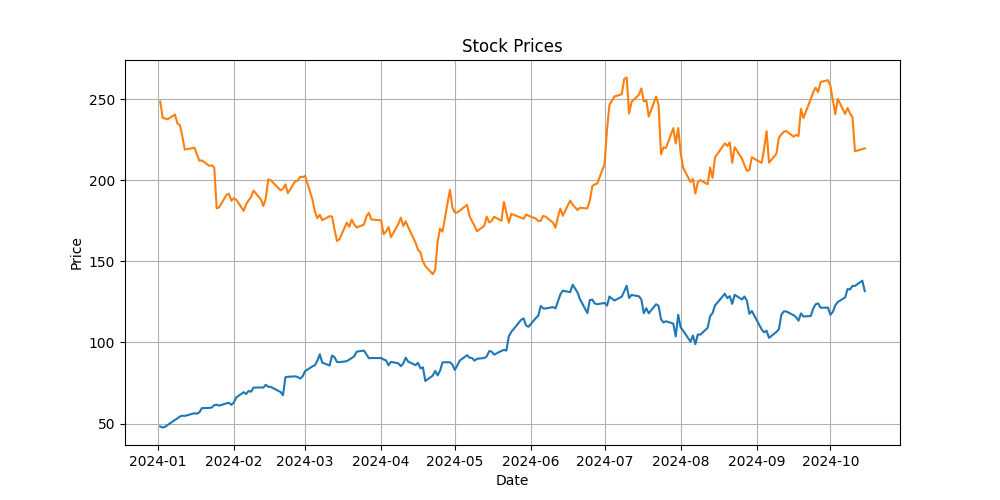

In [39]:
Image(os.path.join("", "stock_prices_YTD_plot.png"))

**Note**: The agent will automatically save the code in a .py file and the plot in a .png file. To access and check the files generated by the agents, go to the `File` menu and select `Open....` Then, open the folder named `coding` to find all the generated files.

In [42]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for AMZN and APPL and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2024-10-16.Download the stock prices YTD for AMZN and APPL and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To complete the task, I will perform the following steps:

1. Use the `get_stock_prices` function to download the stock prices year-to-date (YTD) for the stocks: AMZN (Amazon) and AAPL (Apple). The start date for YTD will be 2024-01-01, and the end date will be the current date, 2024-10-16.
2. Use the `plot_stock_prices` function to create a plot of the downloaded stock prices and save it to a file named `stock_prices_YTD_plot.png`.

Here's the code to execute these steps:

```python
# filename: download_and_plot_stocks.py
from functions import get_stock_prices, plot_stock_prices

# Define stock symbols and date range
stock_symbols 

[*********************100%***********************]  2 of 2 completed


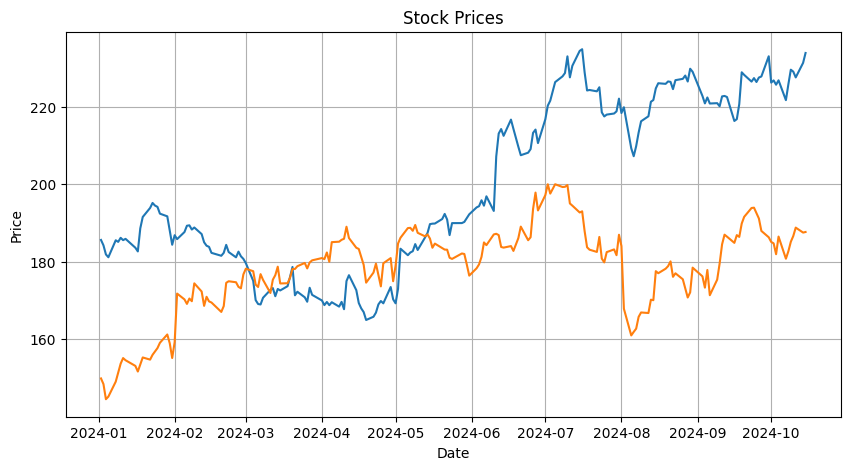

In [44]:

# filename: download_and_plot_stocks.py
# from functions import get_stock_prices, plot_stock_prices

# Define stock symbols and date range
stock_symbols = ['AMZN', 'AAPL']
start_date = '2024-01-01'
end_date = '2024-10-16'

# Download stock prices
stock_prices = get_stock_prices(stock_symbols, start_date, end_date)

# Plot and save the stock prices
plot_stock_prices(stock_prices, 'stock_prices_YTD_plot.png')